In [32]:
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array, load_img, array_to_img, ImageDataGenerator
from keras import models, layers

data_path_mini = '../data/raw/kaggle_mini_subsample'

In [27]:
BATCH_SIZE = 100
TARGET_SIZE = [128, 128]
image_generator = ImageDataGenerator().flow_from_directory(data_path_mini, batch_size=BATCH_SIZE, target_size=TARGET_SIZE);
images, labels = next(image_generator)
images_scaled = images / 255

Found 100 images belonging to 2 classes.


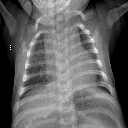

{'NORMAL': 0, 'PNEUMONIA': 1}


In [28]:
display(array_to_img(images[99]))
print(image_generator.class_indices)

In [52]:
SHAPE

128

In [53]:
SHAPE = images_scaled.shape[1]

model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape = (SHAPE,)))
model.add(layers.Dense(2, activation='softmax'))
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=images_scaled, y=labels, epochs=120)

Epoch 1/120


ValueError: in user code:

    C:\Users\seths\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\seths\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\seths\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\seths\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\seths\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\seths\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\seths\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\seths\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\seths\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_14 is incompatible with the layer: expected axis -1 of input shape to have value 128 but received input with shape [None, 128, 128, 3]
